In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
training_dataframe = pd.read_csv('train.csv')
testing_dataframe = pd.read_csv('test.csv')

In [3]:
training_dataframe.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
testing_dataframe.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [5]:
train_x, val_x, train_y, val_y = train_test_split(training_dataframe.pixels, training_dataframe.emotion, test_size=0.15, random_state=30)

In [6]:
train_x.values

array(['152 139 140 122 100 109 120 135 181 179 175 152 164 179 190 199 201 207 216 217 217 213 206 203 198 194 196 198 192 187 180 176 174 171 169 166 157 146 111 69 71 83 84 56 45 37 57 63 150 141 134 108 103 101 126 157 186 176 171 156 165 182 190 196 199 201 207 209 207 204 201 199 193 191 194 197 190 189 183 176 178 174 170 168 162 149 129 84 62 77 90 75 45 62 63 43 135 143 120 104 108 100 135 158 184 176 174 158 167 179 184 190 191 195 193 192 190 185 189 193 189 186 188 190 187 183 179 177 175 171 166 166 161 151 137 102 59 60 79 88 76 74 50 49 144 142 108 109 115 111 140 155 180 174 173 161 167 174 180 184 185 185 181 180 179 176 176 180 180 180 181 181 177 178 176 174 168 162 163 163 159 152 140 114 69 61 68 101 96 57 68 57 145 138 108 116 132 120 142 161 178 173 168 163 167 171 175 179 179 178 176 175 174 170 169 169 172 176 176 176 173 173 172 167 163 161 158 161 156 152 144 121 76 52 88 100 87 63 67 82 148 138 108 130 127 125 158 162 171 173 161 164 167 168 171 173 173 173 

In [7]:
def create_dataset(dataframe):
    dataset = []
    for example in dataframe:
        example = example.split(' ')
        dataset.append(example)
    dataset = np.array(dataset)
    dataset = dataset.reshape(-1, 48, 48, 1)
    dataset = dataset.astype(np.float32)
    return dataset

In [8]:
train_x = create_dataset(train_x)

In [9]:
train_x.shape

(24402, 48, 48, 1)

In [10]:
val_x = create_dataset(val_x)

In [11]:
train_y = tf.keras.utils.to_categorical(train_y)

In [12]:
val_y = tf.keras.utils.to_categorical(val_y)

In [13]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

In [14]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))

In [15]:
training_dataset = training_dataset.batch(128)

In [53]:
inputs = keras.Input(shape=(48, 48, 1))

x = layers.Conv2D(16, 3,activation=tf.nn.relu, padding='same')(inputs)
residual_project = layers.Conv2D(16,3 ,activation=tf.nn.relu, padding='same')(x)
x = layers.Conv2D(16,3 ,activation=tf.nn.relu, padding='same')(x)
x = layers.Add()([x, residual_project])
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation=tf.nn.relu)(x)
outputs = layers.Dense(7, activation=tf.nn.softmax)(x)

In [54]:
model = Model(inputs, outputs, name='FRM')

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [56]:
model.fit(train_x, train_y, epochs=64, validation_data=(val_x, val_y))

Epoch 1/64
763/763 [==============================] - 3s 4ms/step - loss: 1.8829 - acc: 0.2381 - val_loss: 1.8054 - val_acc: 0.2654
Epoch 2/64
763/763 [==============================] - 3s 4ms/step - loss: 1.7901 - acc: 0.2557 - val_loss: 1.7673 - val_acc: 0.2703
Epoch 3/64
763/763 [==============================] - 3s 4ms/step - loss: 1.7613 - acc: 0.2753 - val_loss: 1.7317 - val_acc: 0.3011
Epoch 4/64
763/763 [==============================] - 4s 5ms/step - loss: 1.7333 - acc: 0.2928 - val_loss: 1.7083 - val_acc: 0.3011
Epoch 5/64
763/763 [==============================] - 4s 5ms/step - loss: 1.7056 - acc: 0.3083 - val_loss: 1.6980 - val_acc: 0.3325
Epoch 6/64
763/763 [==============================] - 3s 4ms/step - loss: 1.6857 - acc: 0.3221 - val_loss: 1.6976 - val_acc: 0.3257
Epoch 7/64
763/763 [==============================] - 3s 4ms/step - loss: 1.6680 - acc: 0.3325 - val_loss: 1.6600 - val_acc: 0.3353
Epoch 8/64
763/763 [==============================] - 3s 4ms/step - loss: 1.

763/763 [==============================] - 3s 4ms/step - loss: 1.3691 - acc: 0.4733 - val_loss: 1.4616 - val_acc: 0.4339
Epoch 63/64
763/763 [==============================] - 3s 4ms/step - loss: 1.3668 - acc: 0.4709 - val_loss: 1.4294 - val_acc: 0.4539
Epoch 64/64
763/763 [==============================] - 3s 4ms/step - loss: 1.3598 - acc: 0.4734 - val_loss: 1.4343 - val_acc: 0.4497


In [61]:
test_example = val_x[1]

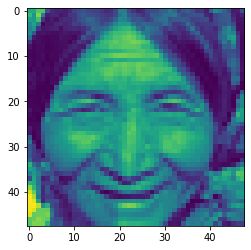

In [62]:
plt.imshow(test_example)

In [63]:
predictions = model(test_example[None,])

In [65]:
np.argmax(predictions)

3